In [1]:
from PlayerCounter import CountPlayers
totalPlayers = CountPlayers()
print(totalPlayers)

11080


c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv(path, parse_dates=["Time"], dayfirst=True)


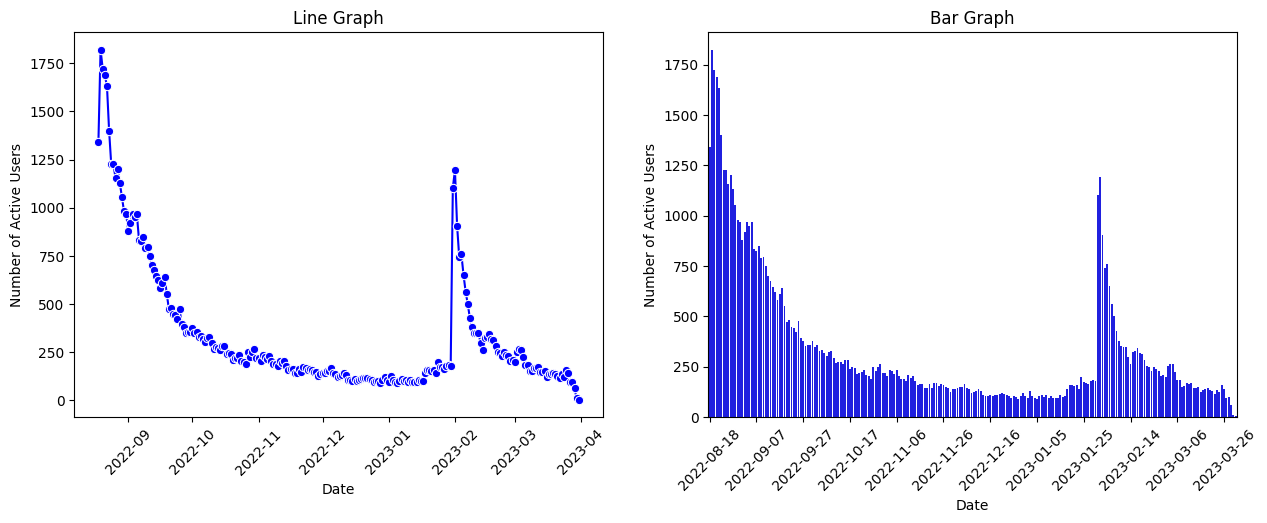

In [2]:
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

dailyUsers = GetDailyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=dailyUsers, x="Date", y="DAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=dailyUsers, x="Date", y="DAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(ticks=range(0, len(dailyUsers), 20), labels=dailyUsers['Date'][::20], rotation=45)

plt.show()

c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv(path, parse_dates=["Time"], dayfirst=True)


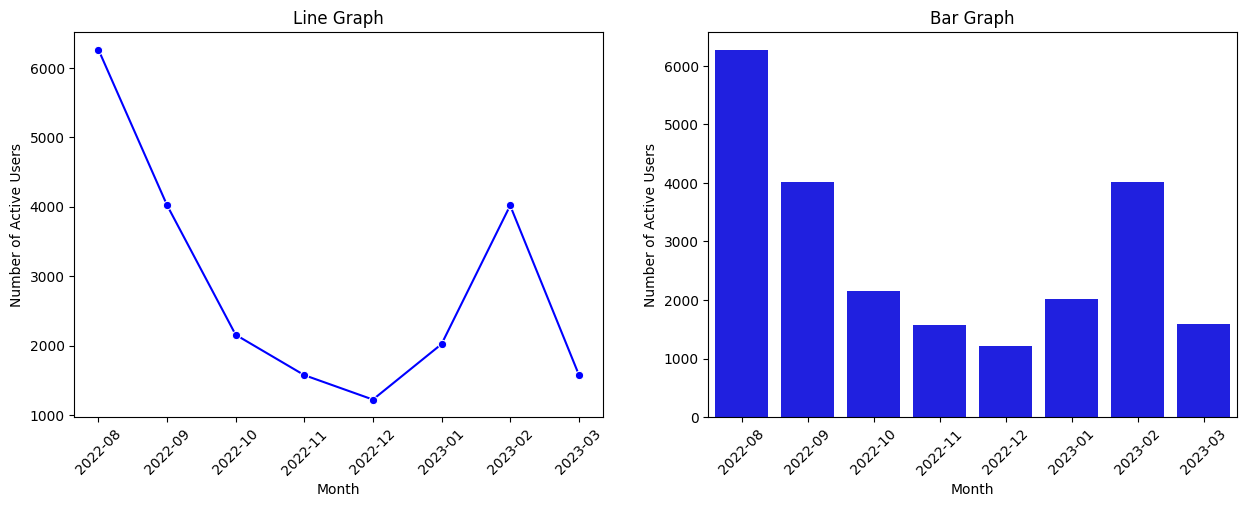

In [3]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

monthlyUsers = GetMonthlyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=monthlyUsers, x="Month", y="MAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=monthlyUsers, x="Month", y="MAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.show()

c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv(path, parse_dates=["Time"], dayfirst=True)
c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv(path, parse_dates=["Time"], dayfirst=True)


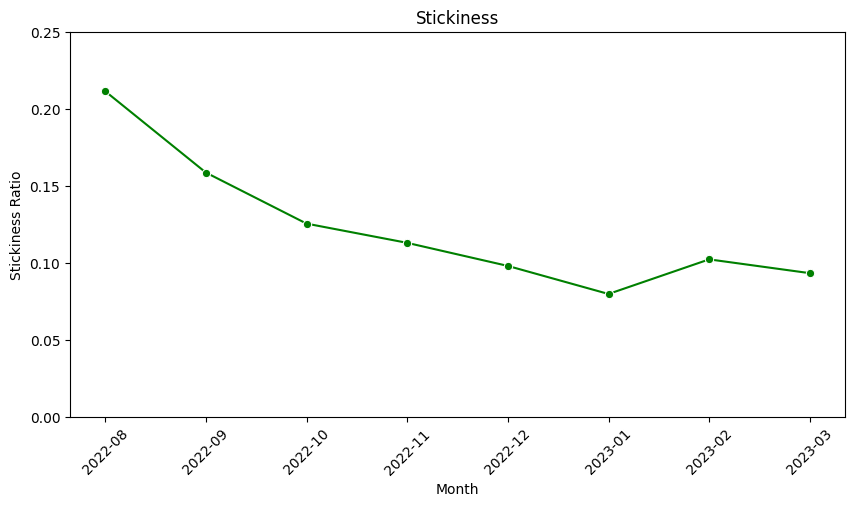

In [4]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

monthlyUsers = GetMonthlyActiveUsers()
dailyUsers = GetDailyActiveUsers()

dailyUsers["Month"] = pd.to_datetime(dailyUsers["Date"]).dt.to_period("M").astype(str)
monthlyDAU = dailyUsers.groupby("Month")["DAU"].mean().reset_index()
stickiness = pd.merge(monthlyDAU, monthlyUsers, on="Month")
stickiness["Stickiness"] = stickiness["DAU"] / stickiness["MAU"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=stickiness, x="Month", y="Stickiness", marker="o", color="g")
plt.title("Stickiness")
plt.xlabel("Month")
plt.ylabel("Stickiness Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 0.25)

plt.show()

### Reflection
#### The graph shows that the amount of times per month that players are returning slowly decreases over time but there is a noticable bump in February of 2023. This is more than likely due to the release of a DLC as PowerWash Sim had several free and premium DLCs that added new levels to the game which could draw back existing players and bring in new players. 

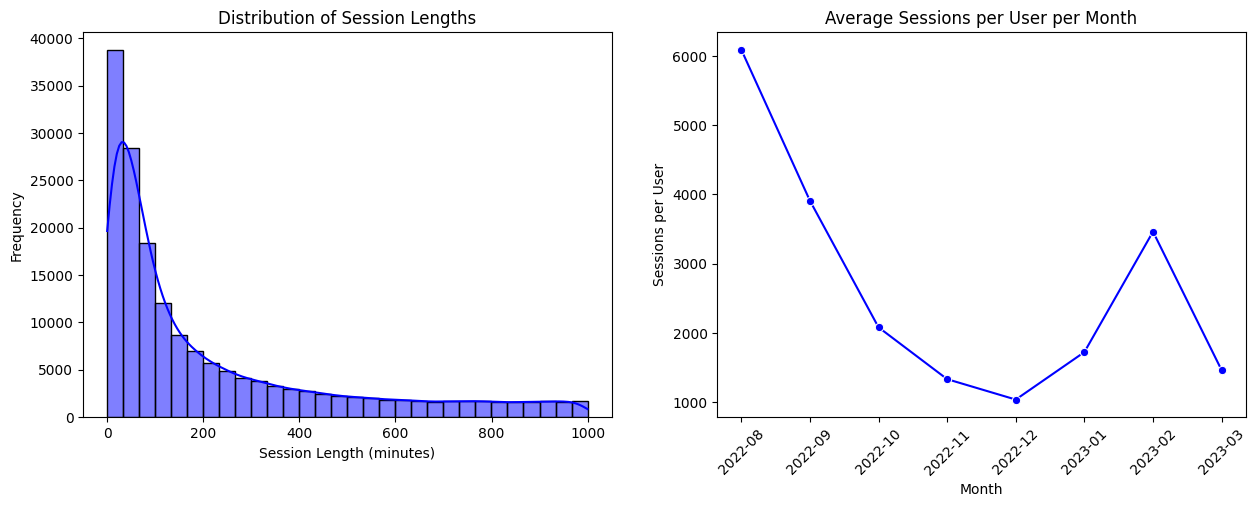

In [5]:
from EstimatedLogins import GetEstimatedSessions
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()

estimatedSessionLengths = pd.merge(logins,logouts,on="pid")

estimatedSessionLengths["SessionTime"] = (estimatedSessionLengths["LogoutTime"] - estimatedSessionLengths["LoginTime"]).dt.total_seconds() / 60

# data does not line up near the end so just drop any negative data any and any sessions over 17ish hours
estimatedSessionLengths = estimatedSessionLengths.loc[(estimatedSessionLengths["SessionTime"] > 0) & (estimatedSessionLengths["SessionTime"] <= 1000)]

#print(estimatedSessionLengths)
totalSessions = total_sessions = len(estimatedSessionLengths)
medianSessionTime = estimatedSessionLengths["SessionTime"].median()
  
estimatedSessionLengths["Month"] = estimatedSessionLengths["LoginTime"].dt.to_period("M").astype(str)
sessionPerMonth = estimatedSessionLengths.groupby("Month")["pid"].nunique().reset_index(name="SessionsPerUser")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(estimatedSessionLengths["SessionTime"], bins=30, color="blue", kde=True)
plt.title("Distribution of Session Lengths")
plt.xlabel("Session Length (minutes)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.lineplot(data=sessionPerMonth, x="Month", y="SessionsPerUser", marker="o", color="b")
plt.title("Average Sessions per User per Month")
plt.xlabel("Month")
plt.ylabel("Sessions per User")
plt.xticks(rotation=45)

plt.show()

Total Estimated Sessions: 159264
Median Session Time: 109.62 minutes


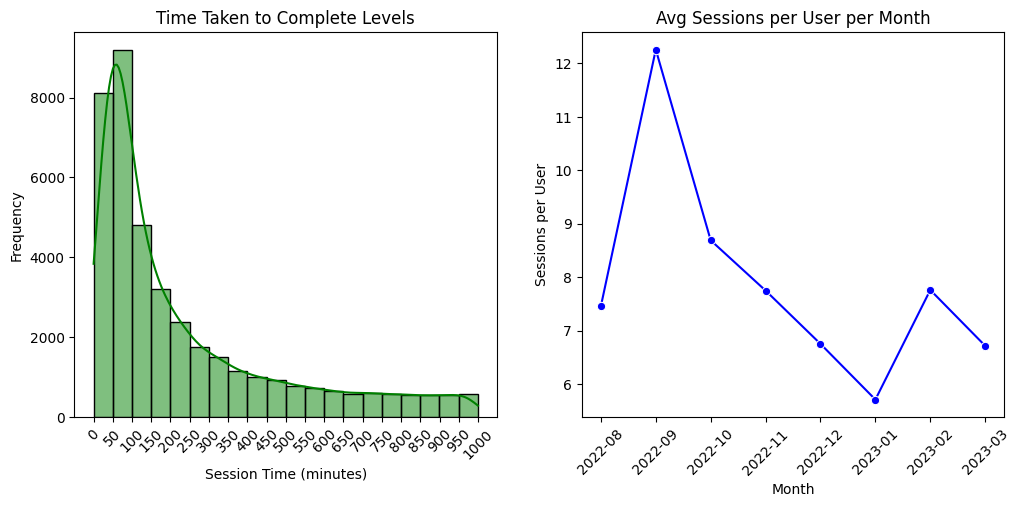

In [ ]:
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
from PlayerCounter import GetLevelProgression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()
progression = GetLevelProgression()

estimatedSessionLengths = pd.merge(logins, logouts, on="pid")
estimatedSessionLengths = pd.merge(estimatedSessionLengths, progression, on=["pid", "LogoutTime"])

estimatedSessionLengths["SessionTime"] = ((estimatedSessionLengths["LogoutTime"] - estimatedSessionLengths["LoginTime"]).dt.total_seconds() / 60)

estimatedSessionLengths = estimatedSessionLengths.loc[(estimatedSessionLengths["SessionTime"] > 0) & (estimatedSessionLengths["SessionTime"] <= 1000) 
                                                      &(estimatedSessionLengths["LevelProgressionAmount"] >= 0) & (estimatedSessionLengths["LevelProgressionAmount"] <= 1)]

totalSessions = len(estimatedSessionLengths)
medianSessionTime = estimatedSessionLengths["SessionTime"].median()

estimatedSessionLengths["Month"] = estimatedSessionLengths["LoginTime"].dt.to_period("M").astype(str)

sessions_per_month = estimatedSessionLengths.groupby("Month")["pid"].count().reset_index(name="TotalSessions")
users_per_month = estimatedSessionLengths.groupby("Month")["pid"].nunique().reset_index(name="UniqueUsers")
sessions_per_user_month = pd.merge(sessions_per_month, users_per_month, on="Month")
sessions_per_user_month["AvgSessionsPerUser"] = (sessions_per_user_month["TotalSessions"] / sessions_per_user_month["UniqueUsers"])

completedLevels = estimatedSessionLengths[estimatedSessionLengths["LevelProgressionAmount"] == 1.0]

print(f"Total Estimated Sessions: {totalSessions}")
print(f"Median Session Time: {medianSessionTime:.2f} minutes")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(completedLevels["SessionTime"], bins=20, color="green", kde=True)
plt.title("Time Taken to Complete Levels")
plt.xlabel("Session Time (minutes)")
plt.ylabel("Frequency")
plt.xticks(ticks=range(0, 1050, 50), rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=sessions_per_user_month, x="Month", y="AvgSessionsPerUser", marker="o", color="blue")
plt.title("Avg Sessions per User per Month")
plt.xlabel("Month")
plt.ylabel("Sessions per User")
plt.xticks(rotation=45)

plt.show()


### Reflection
### Players seem to play less sessions per month as time went on but did noticibly seem to return to the game likely due to a DLC release as PowerWash sim had several paid and free DLCs that were released over time. The sharp decrease in sessions over time may be because PowerWash Sim was on Xbox Gamepass and so a lot of people might not have actually bought the game and were fine with only playing for a bit before stopping

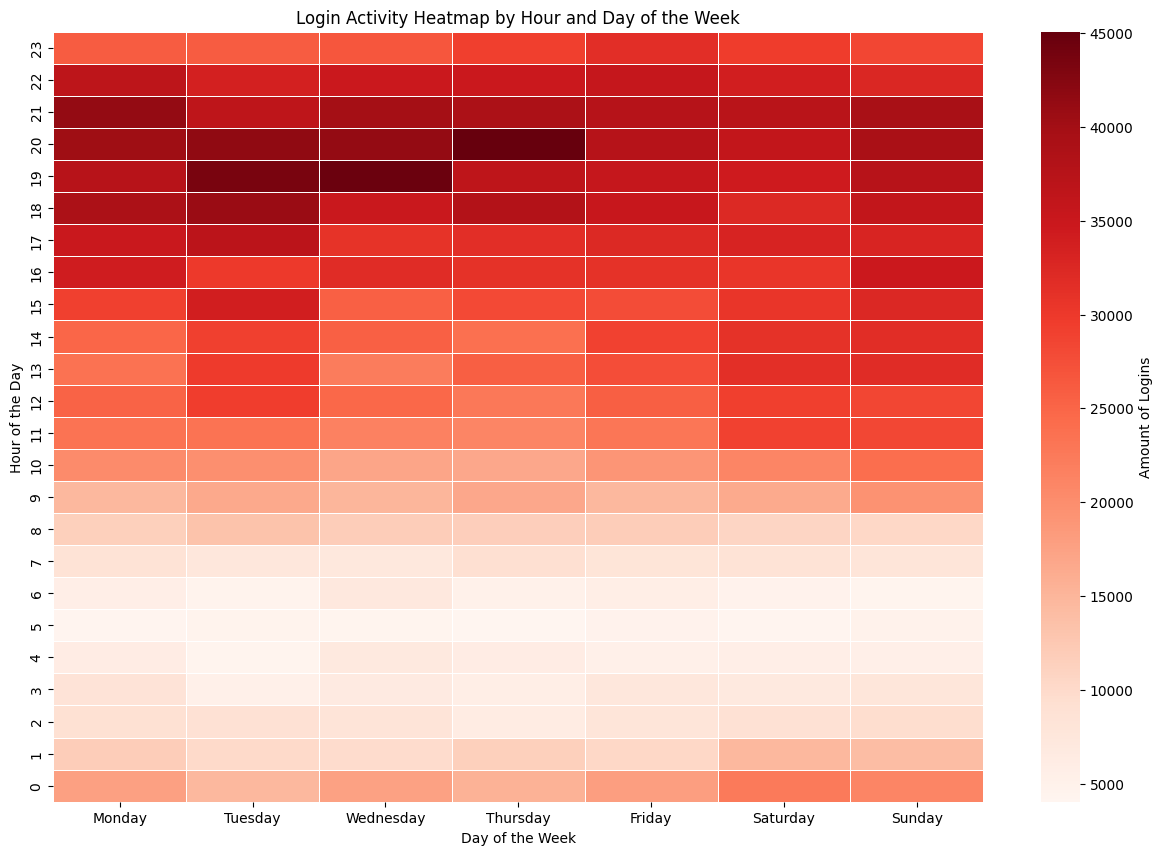

In [7]:
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
from PlayerCounter import GetLevelProgression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()
progression = GetLevelProgression()

estimatedSessionLengths = pd.merge(logins, logouts, on="pid")
estimatedSessionLengths = pd.merge(estimatedSessionLengths, progression, on=["pid", "LogoutTime"])

estimatedSessionLengths["LoginHour"] = estimatedSessionLengths["LoginTime"].dt.hour
estimatedSessionLengths["DayOfWeek"] = estimatedSessionLengths["LoginTime"].dt.day_name()

heatmapLogins = estimatedSessionLengths.groupby(["DayOfWeek", "LoginHour"]).size().unstack(fill_value=0)
heatmapLogins = heatmapLogins.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

heatmapLogins = heatmapLogins.T#put days on the bottom
heatmapLogins = heatmapLogins.sort_index(ascending=False)#invert the hours so 0 is on the bottom

plt.figure(figsize=(15, 10))
sns.heatmap(heatmapLogins, cmap="Reds", fmt="d", linewidths=0.5, cbar_kws={'label': 'Amount of Logins'})

plt.title("Login Activity Heatmap by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")

plt.show()